# Principal Component Analysis(PCA)

According to Wikipedia, PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.

<center><img src="https://mlux9brz2apw.i.optimole.com/y1pDtVQ-h_2-H5-w/w:1024/h:384/q:auto/https://kgptalkie.com/wp-content/uploads/2020/08/image-179.png"/></center>

# Principal Components
These are the new axes that descibe the variation in the data.

  1. Principal component 1: The axis which spans the most variation of the data.
  2. Principal component 2: The axis which spans the second most variation of the data.
  3. Principal component 3: The axis which spans the third most variation of the data and so on.

# When to use PCA
We can use PCA in the following cases:

  1. Data Visualization.
  2. It is used to find inter-relation between variables in the data.
  3. Speeding Machine Learning (ML) Algorithm.
  4. It’s often used to visualize genetic distance and relatedness between populations.
  5. As number of variables are decreasing it makes further analysis simpler.

# Objectives of PCA
The main objectives of the PCA are:

  1. It is basically a non-dependent procedure in which it reduces attribute space from a large number of variables to a smaller number of factors.
  2. PCA is basically a dimension reduction process but there is no guarantee that the dimension is interpretable.
  3. Main task in this PCA is to select a subset of variables from a larger set, based on which original variables have the highest correlation with the principal amount.

# How to do PCA

<center><img src="https://miro.medium.com/max/875/1*UpFltkN-kT9aGqfLhOR9xg.gif"/></center>

As there are as many principal components as there are variables in the data, principal components are constructed in such a manner that the first principal component accounts for the largest possible variance in the data set .

The second principal component is calculated in the same way, with the condition that it is uncorrelated with (i.e., perpendicular to) the first principal component and that it accounts for the next highest variance.

Once fit, the eigenvalues and principal components can be accessed on the PCA class via the explained_variance_ and components_ attributes.

# Principal Axis Method

PCA will search a linear combination of variables so that we can extract maximum variance from the variables. Once this process completes it will remove it and search for another linear combination which will give an explanation about the maximum proportion of remaining variance which basically leads to orthogonal factors. In this method, we analyze total variance.

# PCA Summary

From the following figure, I will make you understand how PCA works in a nutshell.

There are few steps, Let’s see one after other:

In the first step we have a correlated high dimenasion data. And then we calculate the center of the points and calculate variance of the data by using covariance matrix of the data and with this matrix we calculate eigen vectors and eigen values.
After calculating these, we pick the value of m such that less than original dimension.
Then after we will project 'data points into thoseeigen vectorsand we do the inverse transform so we will getuncorrelated low dimensional' data.

Though mathematically it looks little bit complex but fortunately in python we have sklearn library there we have PCA package just we call PCA() and then call pca.fit() as usual we do in ML algorithms.

<center><img src="https://devopedia.org/images/article/139/4543.1548137789.jpg"/></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

In [4]:
cancer = datasets.load_breast_cancer()

In [6]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [7]:
df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [11]:
X_scaled = scaler.fit_transform(df)

In [15]:
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca=PCA(n_components=2, random_state=42)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
X_pca=pca.transform(X_scaled)

In [19]:
X_scaled.shape, X_pca.shape

((569, 30), (569, 2))

Text(0, 0.5, 'Second Principle Component')

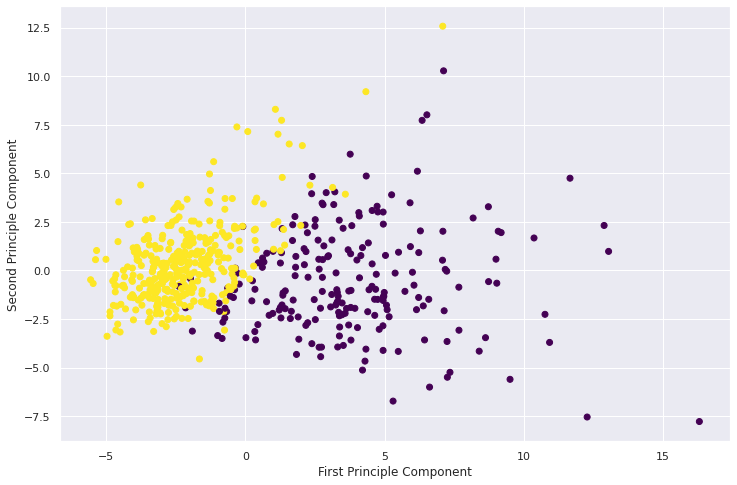

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer.target, cmap="viridis")
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")

In [23]:
help(pca)

Help on PCA in module sklearn.decomposition._pca object:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  P

In [24]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

<BarContainer object of 8 artists>

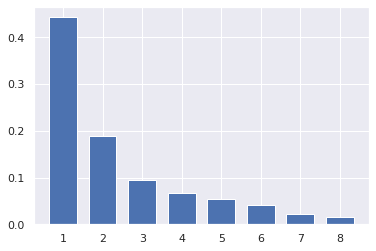

In [28]:
pca=PCA(n_components=8, random_state=42)
X_pca=pca.fit_transform(X_scaled)
variance=pca.explained_variance_ratio_

plt.bar(x=range(1,len(variance)+1), height=variance, width=0.7)

In [26]:
variance

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
       8.82724536e-05, 6.64883951e-06, 4.01713682e-06, 8.22017197e-07])